# Instructions

url: https://www.imdb.com/title/tt0068646/reviews?ref_=tt_ql_3

• retrieve the reviews (requests, BeautifulSoup)

• load the file emotionWords.csv into a variable

• apply tokenization and stemming to emotion words and reviews

• for the first 10 reviews:

    • count the occurrences of each word from emotionWords in all the reviews
    
    • plot a histogram for the occurrences of each word in all the reviews


# Code

In [19]:
from bs4 import BeautifulSoup
from requests import get
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import nltk

In [20]:
# executing get request for the url and parsing
request_response = get("https://www.imdb.com/title/tt0068646/reviews?ref_=tt_ql_3")
parsed = BeautifulSoup(request_response.text, 'html.parser')


In [21]:
#extracting the reviews part fo the html
reviews = parsed.find_all("div", class_ = "text show-more__control")
reviews


[<div class="text show-more__control">Up until today, I haven't bothered to review "The Godfather". After all, everyone pretty much knows it's one of the greatest films ever made. It's #2 on IMDb's Top 100. It won the Best Picture Oscar. And, there are nearly 1600 reviews on IMDb. So what's one more review?! Well, after completing 14,000 reviews (because I am nuts), I guess it's time I got around to reviewing a film I should have reviewed a long time ago. So, here goes....the film is perfect and only a dope wouldn't watch it. Unfortunately, IMDb requires me to say more to meet it's 10 line minimum for reviews. So, I'll point out that you do NOT need to like gangster films to enjoy this film. Yes, it's violent and nasty in spots--but it's also brilliantly written and produced from start to finish and deserves the accolades it's received.<br/><br/>My advice is that instead of just watching "The Godfather" and "The Godfather: Part II", see the combined version they created for television-

In [22]:
# loading file emotionWords.csv 
file = pd.read_csv("emotionWords.csv", header=None)
file.columns = ["words"]
file

,words
0,great
1,happy
2,faithful
3,good
4,like
5,pretty
6,kind
7,lucky
8,sorry
9,worst


In [23]:
# tokenisation on reviews and stemming
ps = PorterStemmer()
stem = PorterStemmer()

#extraxting first 10 reviews and tockenizing them at the same time
ten_reviews = []
stemmed_reviews_separate = []
stemmed_reviews_combined = []

for i in range(10):   
    tockenized = nltk.word_tokenize(reviews[i].getText()) # tockenisation
    ten_reviews.append(tockenized)
    
    for j in ten_reviews:
        stem_j = []
        for item in j:
            stem_j.append(ps.stem(item))
            stemmed_reviews_separate.append(stem_j) # stemming
            stemmed_reviews_combined.append(ps.stem(item))

# tockenisation on emotionWords and stemming
words_list = file["words"].to_list()

words_list_tockenised = []
words_list_stemmed = []
for i in words_list:
    words_list_tockenised.append(nltk.word_tokenize(i)[0])
for j in words_list_tockenised:
    words_list_stemmed.append(ps.stem(j))
    
print(words_list_tockenised)
print(words_list_stemmed)

['great', 'happy', 'faithful', 'good', 'like', 'pretty', 'kind', 'lucky', 'sorry', 'worst', 'rare', 'wrong', 'poor', 'angry', 'mean', 'bad', 'sad', 'dead']
['great', 'happi', 'faith', 'good', 'like', 'pretti', 'kind', 'lucki', 'sorri', 'worst', 'rare', 'wrong', 'poor', 'angri', 'mean', 'bad', 'sad', 'dead']


In [28]:
# count occurances of emotion words in first ten reviews

words_list_stemmed_np = np.array(words_list_stemmed)
stemmed_reviews_combined_np = np.array(stemmed_reviews_combined)

df = pd.DataFrame(words_list_stemmed_np)
correct_all = []

for i in range(len(words_list_stemmed_np)):
    correct_1 = np.where(stemmed_reviews_combined_np == words_list_stemmed_np[i], 1, 0)
    correct_count = sum(correct_1)
    correct_all.append(correct_count)
    
df.columns = ["words"]
df["count"] = correct_all

df


,words,count
0,great,41
1,happi,16
2,faith,0
3,good,43
4,like,87
5,pretti,14
6,kind,1
7,lucki,10
8,sorri,0
9,worst,0


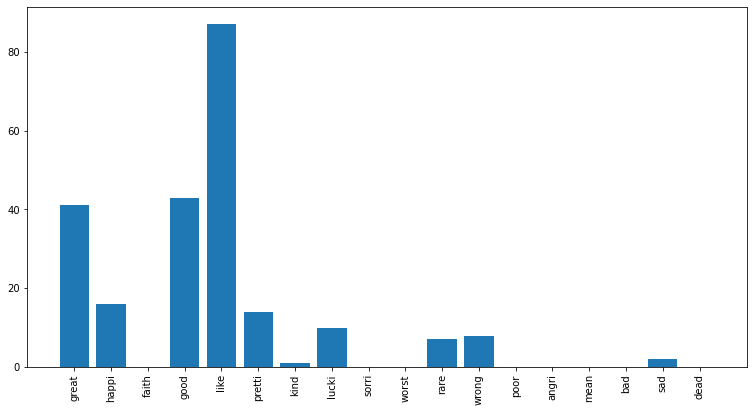

In [29]:
# plot the occurances of each word in all reviews

graf = plt.figure(figsize = (10,5))
ax = graf.add_axes([0,0,1,1])
plt.xticks(rotation = 90)
ax.bar(df["words"], df["count"])

plt.show()